# Healthcare-Dataset-Preprocessing

*`Imports`*

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*`load data`*

In [3]:
# use os to join the current working directory with the file path
FILE_PATH = os.path.join(os.getcwd(), 'healthcare-dataset-stroke-data.csv')
df = pd.read_csv(FILE_PATH)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Dataset Description

- The Stroke Prediction Dataset contains information about patients and various health-related attributes.
- The goal is to predict whether a patient is likely to experience a stroke based on these attributes.

### Problem Defination 

- Stroke is one of the leading causes of death and disability. Early prediction of stroke risk can help in taking preventive measures. 
- The aim of this analysis is to build a predictive model that accurately classifies whether a person will experience a stroke based on their medical and demographic data.
- We will start with EDA amd preprocesssing of the dataset in this notebook

### EDA

In [19]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
# modify the column names to be more user-friendly
df.columns = df.columns.str.replace(' ', '_').str.lower().str.strip()

In [161]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [24]:
# quick check of the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]         # will handle later 


bmi    201
dtype: int64

In [29]:
# Check for duplicates
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

In [ ]:
# stats for numerical columns
df.describe(include='number').T
# max far from 75%

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [35]:
# stats for categorical columns
df.describe(include='object').T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [18]:
# ranges of the data and possible values for categorical columns

for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")
    else:
        print(f"{col}: min={df[col].min()}, max={df[col].max()}")

id: min=67, max=72940
gender: ['Male' 'Female' 'Other']
age: min=0.08, max=82.0
hypertension: min=0, max=1
heart_disease: min=0, max=1
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
avg_glucose_level: min=55.12, max=271.74
bmi: min=10.3, max=97.6
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke: min=0, max=1


In [ ]:
# Display all duplicate rows
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicates))
# Display the duplicate rows if exists
if len(duplicates) > 0:
    print("Duplicate rows:")
    print(duplicates)

Number of duplicate rows: 0


In [7]:
# Displaying mode, median, and mean for all numeric columns
for col in df.select_dtypes(include='number').columns:
    mode = df[col].mode()[0] if not df[col].mode().empty else 'No mode'
    median = df[col].median()
    mean = df[col].mean()
    print(f"Column: {col}\nMode: {mode}\nMedian: {median}\nMean: {mean}\n")


Column: id
Mode: 67
Median: 36932.0
Mean: 36517.82935420744

Column: age
Mode: 78.0
Median: 45.0
Mean: 43.226614481409

Column: hypertension
Mode: 0
Median: 0.0
Mean: 0.0974559686888454

Column: heart_disease
Mode: 0
Median: 0.0
Mean: 0.05401174168297456

Column: avg_glucose_level
Mode: 93.88
Median: 91.88499999999999
Mean: 106.1476771037182

Column: bmi
Mode: 28.7
Median: 28.1
Mean: 28.893236911794666

Column: stroke
Mode: 0
Median: 0.0
Mean: 0.0487279843444227



Text(0.5, 1.0, 'Distribution of Stroke Cases')

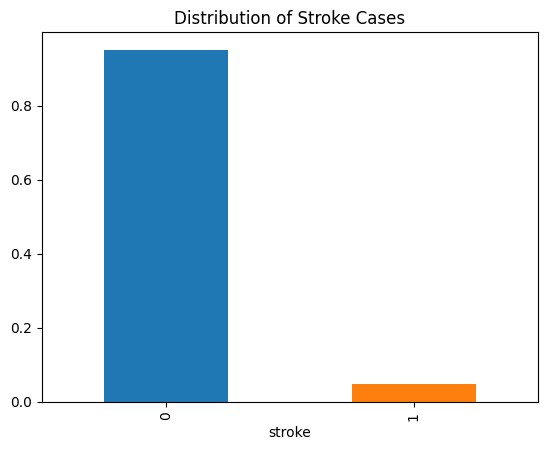

In [40]:
# Check the distribution of the target variable
df['stroke'].value_counts(normalize=True).plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Stroke Cases')


# stroke=0: No stroke, stroke=1: Stroke
# stroke=1 is the positive class (required for prediction)

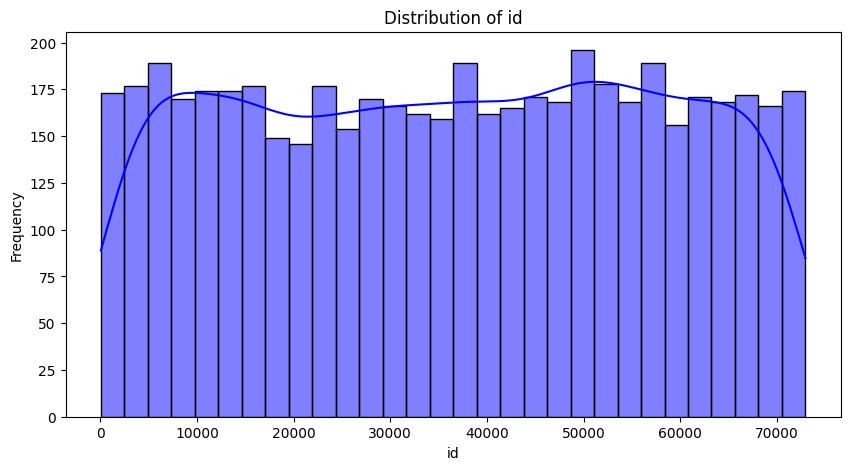

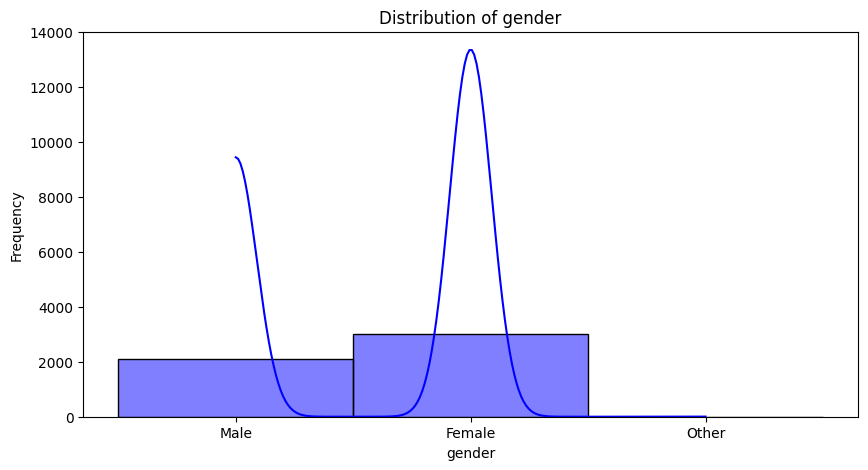

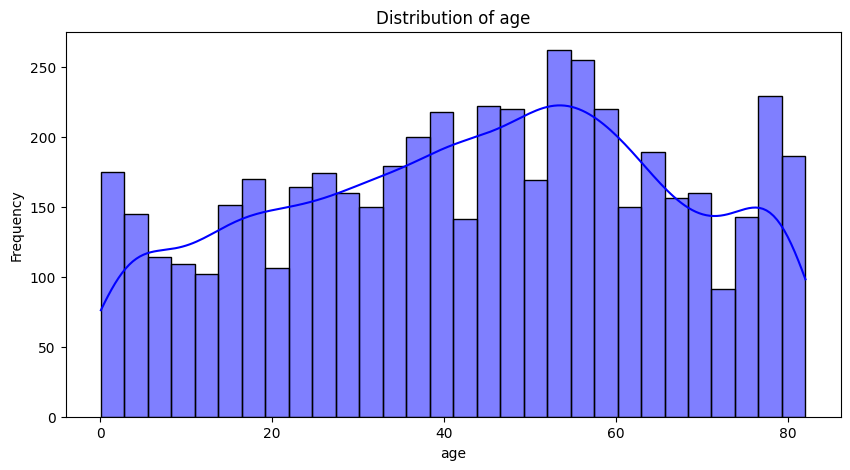

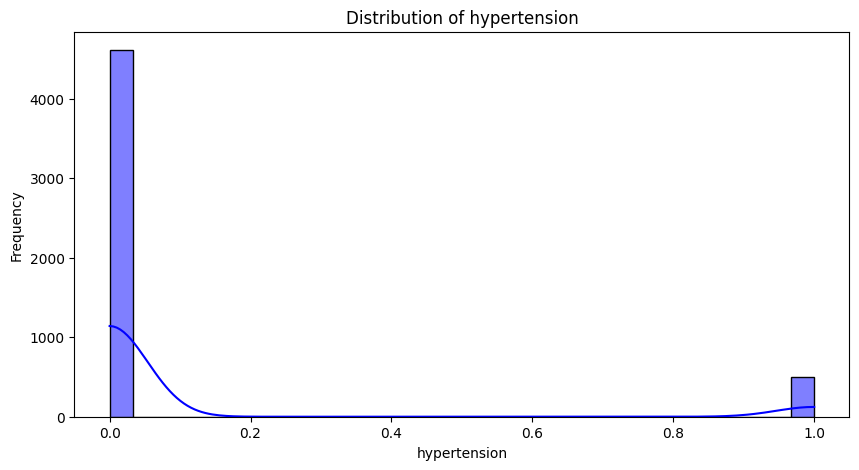

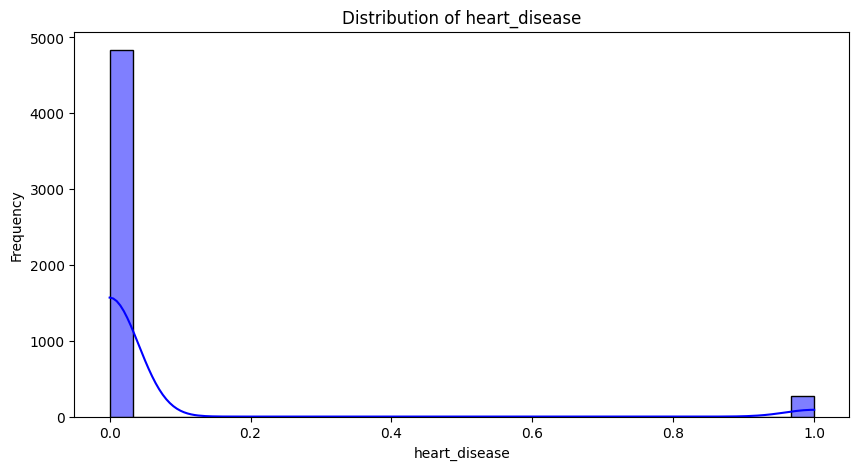

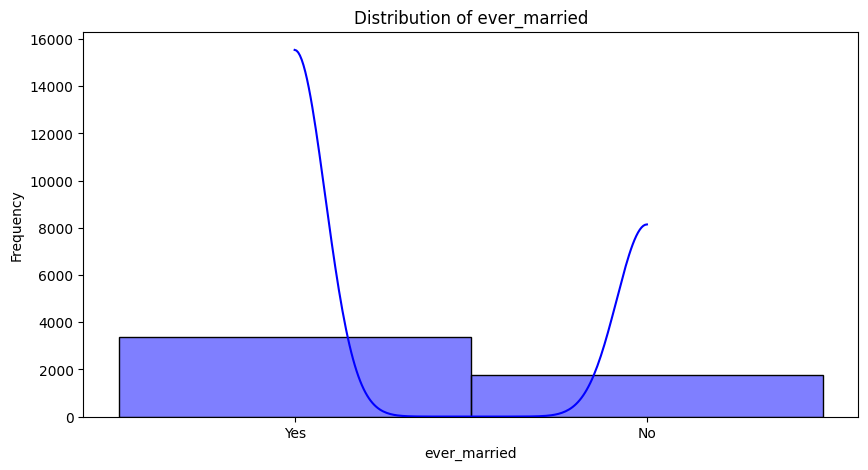

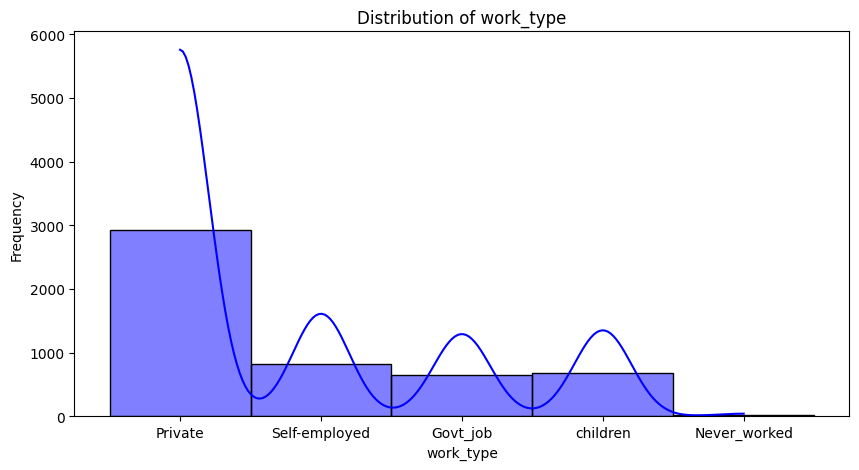

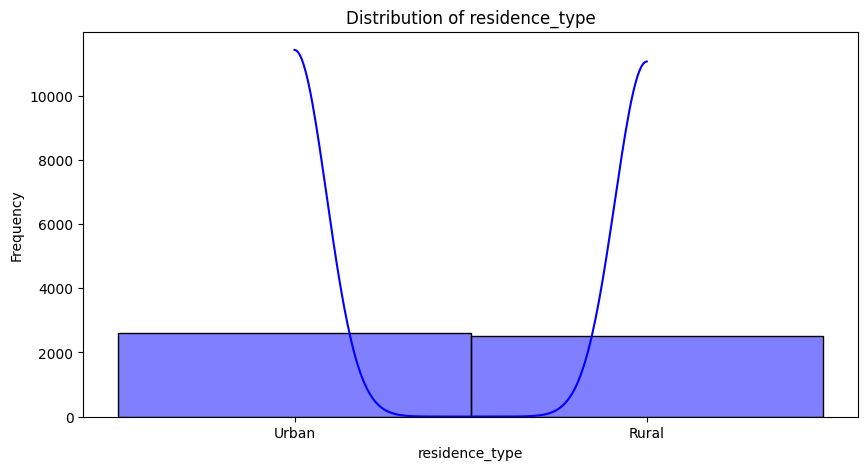

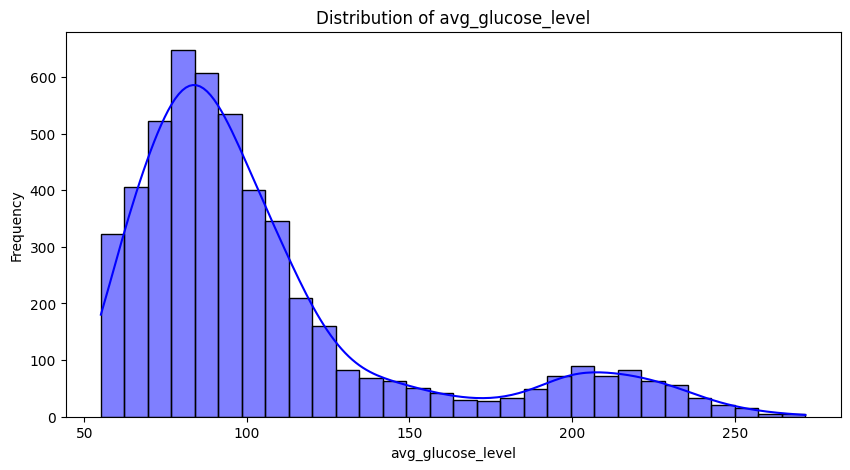

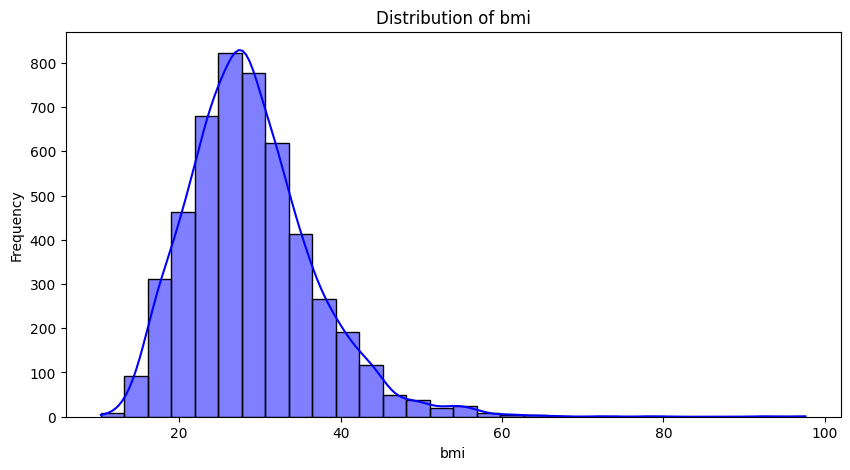

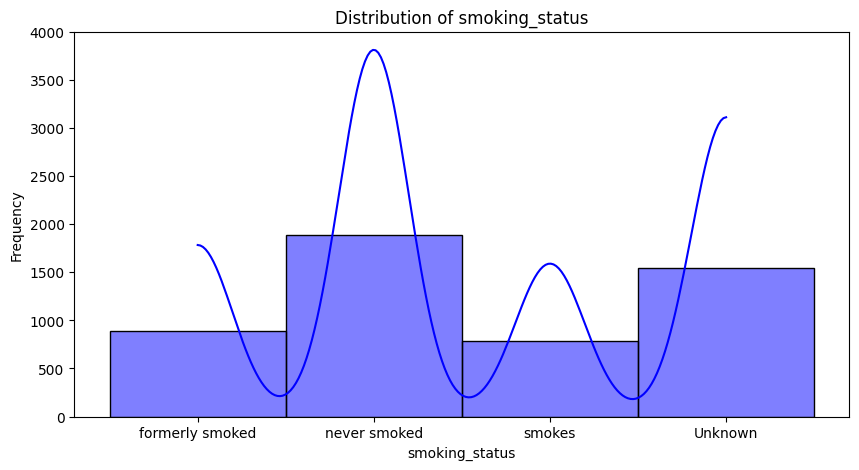

In [ ]:
# features distribution alone

for col in df.columns:
    if col != 'stroke':
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


*`Bivariate Analysis`*

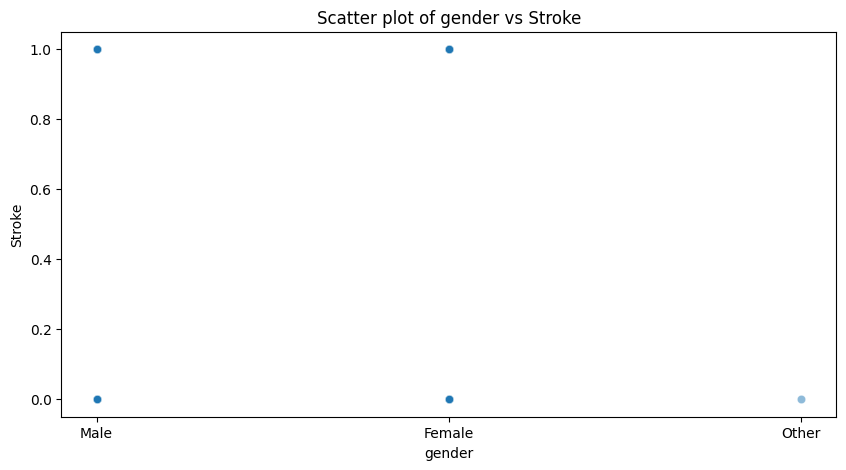

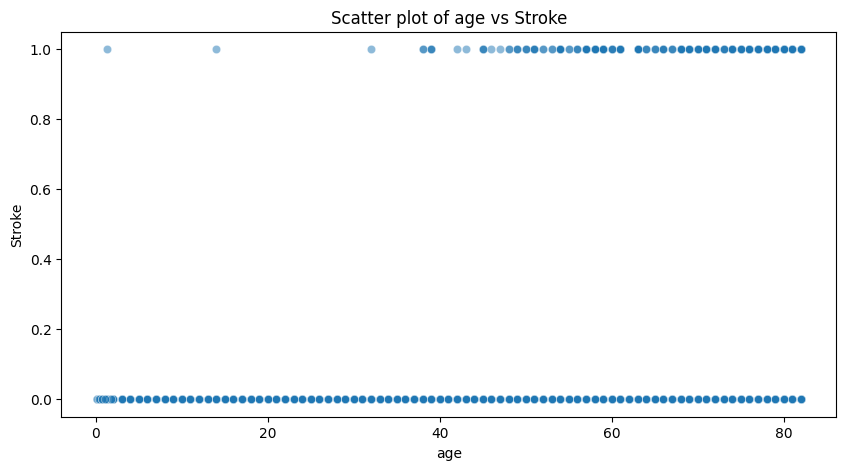

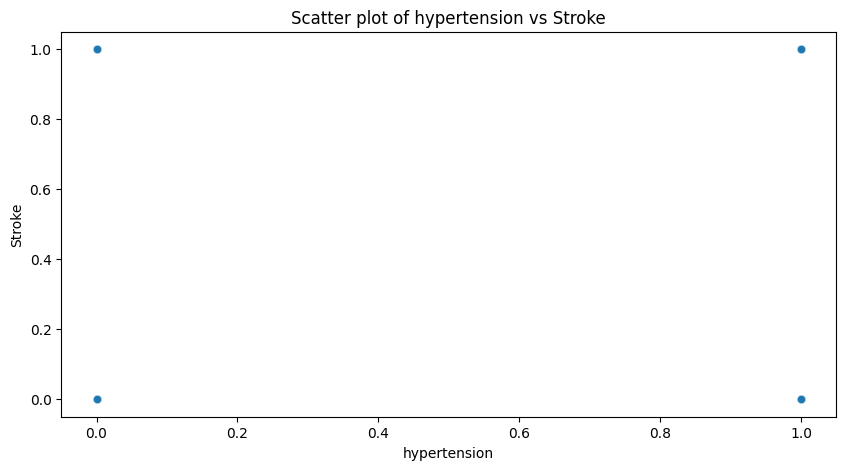

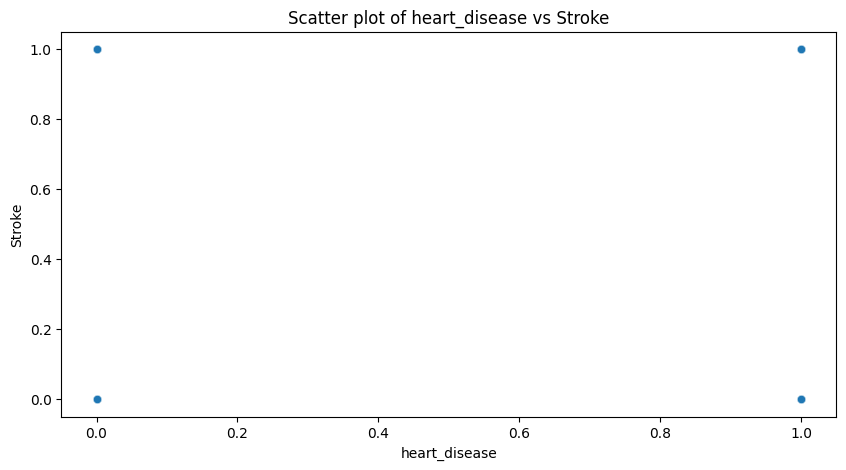

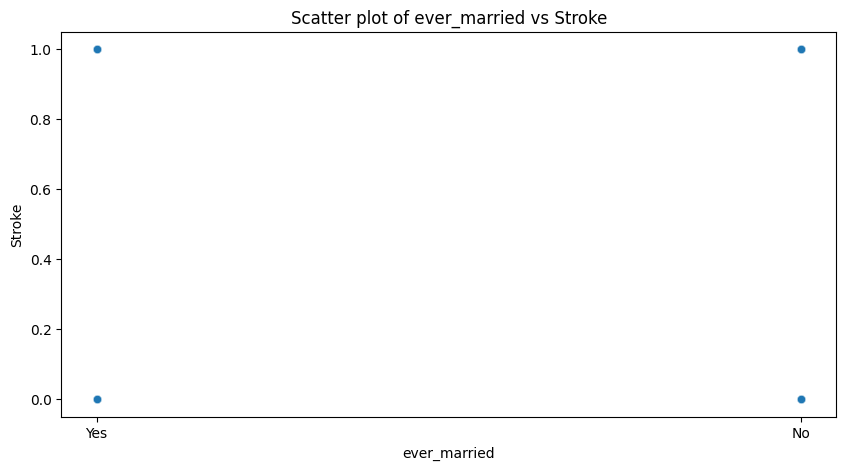

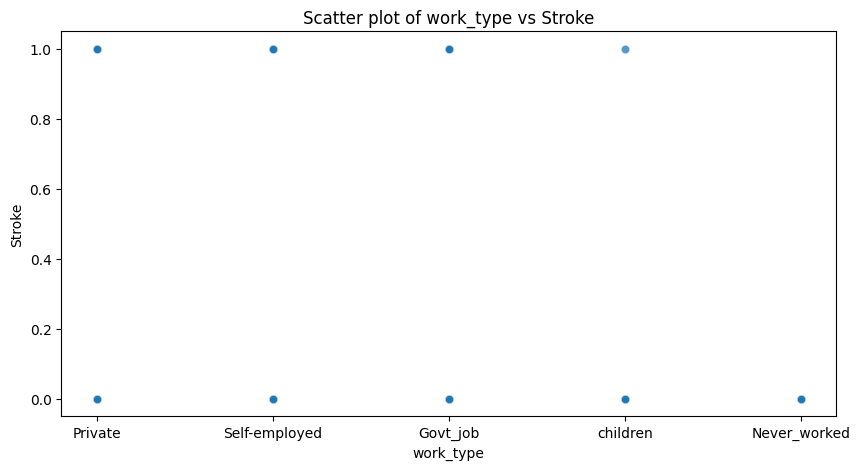

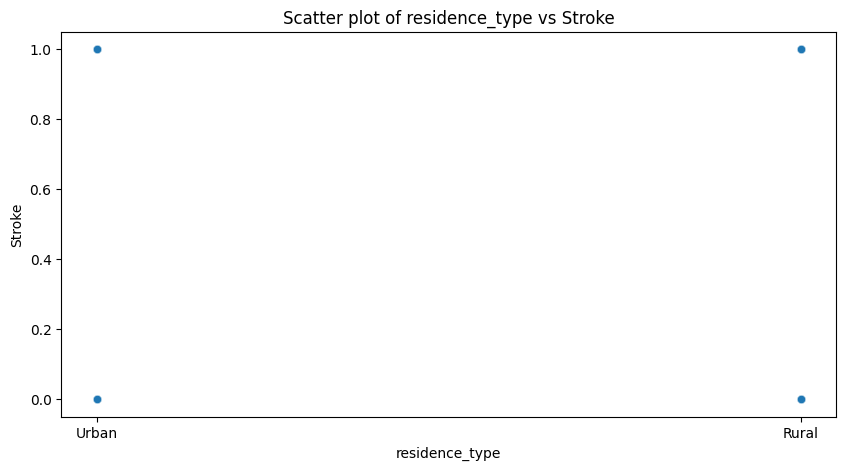

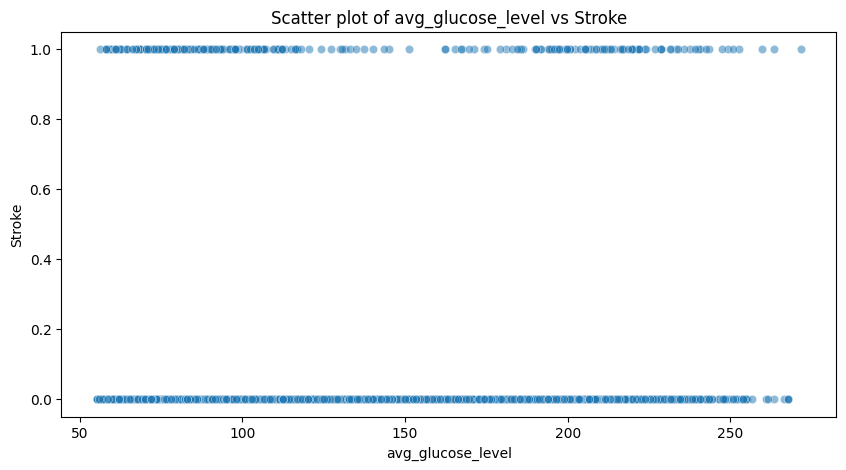

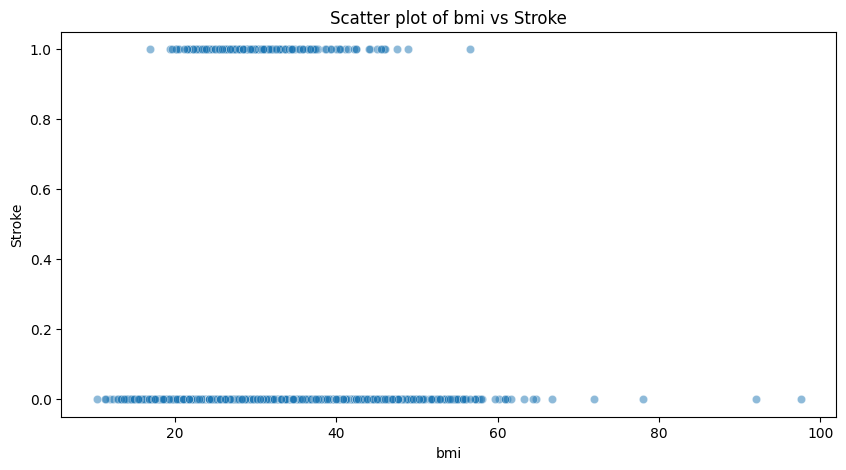

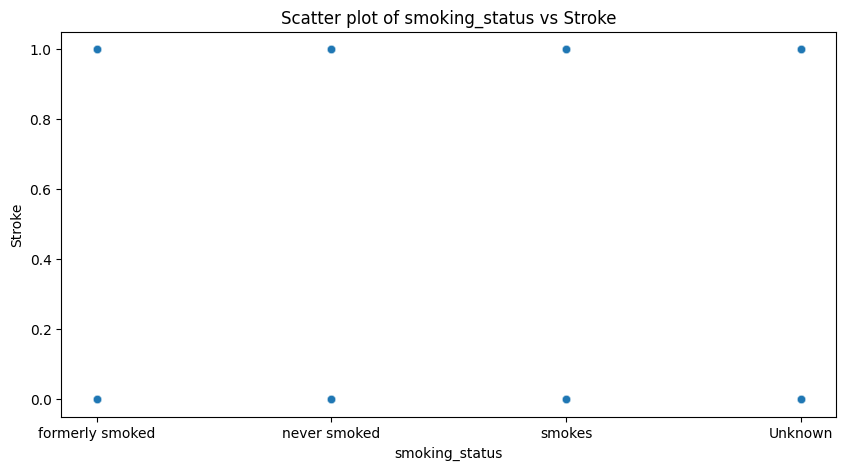

In [ ]:
# scatter plots(features vs target)

for col in select(df.columns):
    if col != 'stroke':
        plt.figure(figsize=(10, 5))
        sns.scatterplot(data=df, x=col, y='stroke', alpha=0.5)
        plt.title(f'Scatter plot of {col} vs Stroke')
        plt.xlabel(col)
        plt.ylabel('Stroke')
        plt.show()


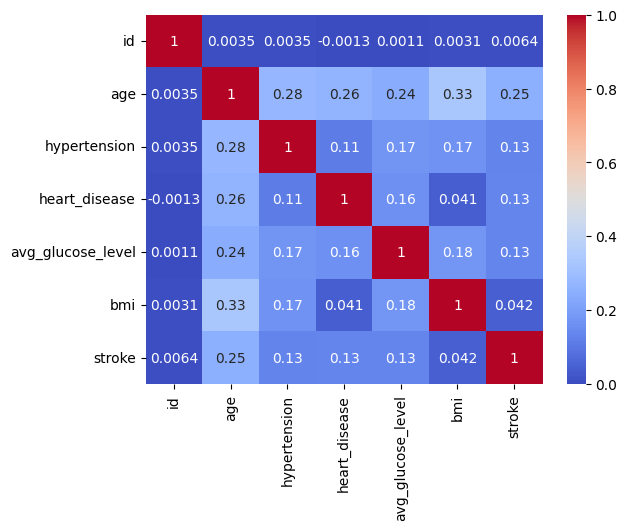

In [ ]:
# correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Preprocessing

*`Drop id`*

In [162]:
id_series = df['id']           # Save the 'id' column as a separate Series -> may use later in mapping the predictions back to the original data
df = df.drop(columns=['id'])   # Drop the 'id' column from the DataFrame

print("ID series saved separately:")
print(id_series.head())

print("\nData without ID column:")
print(df.head())

ID series saved separately:
0     9046
1    51676
2    31112
3    60182
4     1665
Name: id, dtype: int64

Data without ID column:
   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1 

In [138]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


*`Encoding`*

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns = ['gender', 'ever_married', 'work_type', 'smoking_status', 'residence_type']  

# Dictionary to store encoders(use for decoding later) and mappings
label_encoders = {}
mappings = {}

# Encoding and creating mappings in a single loop
for col in columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    label_encoders[col] = encoder

    # Creating a dictionary of original: encoded pairs
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    mappings[col] = mapping

In [164]:
# chech after encoding
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [165]:
# mapping the encoded values back to original values
print("\nOriginal to Encoded Mappings:")
for col, mapping in mappings.items():
    print(f"{col}: {mapping}")


Original to Encoded Mappings:
gender: {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}
ever_married: {'No': np.int64(0), 'Yes': np.int64(1)}
work_type: {'Govt_job': np.int64(0), 'Never_worked': np.int64(1), 'Private': np.int64(2), 'Self-employed': np.int64(3), 'children': np.int64(4)}
smoking_status: {'Unknown': np.int64(0), 'formerly smoked': np.int64(1), 'never smoked': np.int64(2), 'smokes': np.int64(3)}
residence_type: {'Rural': np.int64(0), 'Urban': np.int64(1)}


*`handle missing values`*

In [166]:
# Check the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
missing_percentage[missing_percentage > 0]  # Display columns with missing value

bmi    3.933464
dtype: float64

outliers handling firstly,impute missing values at the end 

In [167]:
# impute missing values using k-nearest neighbors
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors based on your data
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)    # in-place 

In [168]:
# Check if there are any missing values left after imputation

missing_values_after_imputation = df.isnull().sum()
missing_values_after_imputation[missing_values_after_imputation > 0] 

Series([], dtype: int64)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   ever_married       5110 non-null   float64
 5   work_type          5110 non-null   float64
 6   residence_type     5110 non-null   float64
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   float64
 10  stroke             5110 non-null   float64
dtypes: float64(11)
memory usage: 439.3 KB


*`Scaling`*

In [170]:
#check if scaling is needed 

for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")
    else:
        print(f"{col}: min={df[col].min()}, max={df[col].max()}")

gender: min=0.0, max=2.0
age: min=0.08, max=82.0
hypertension: min=0.0, max=1.0
heart_disease: min=0.0, max=1.0
ever_married: min=0.0, max=1.0
work_type: min=0.0, max=4.0
residence_type: min=0.0, max=1.0
avg_glucose_level: min=55.12, max=271.74
bmi: min=10.3, max=97.6
smoking_status: min=0.0, max=3.0
stroke: min=0.0, max=1.0


In [171]:
# standarization for logestic regression later

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])


In [172]:
# check the scaled values

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,1.051434,0.0,1.0,1.0,2.0,1.0,2.706375,0.985740,1.0,1.0
1,0.0,0.786070,0.0,0.0,1.0,3.0,0.0,2.121559,0.607142,2.0,1.0
2,1.0,1.626390,0.0,1.0,1.0,2.0,0.0,-0.005028,0.457763,2.0,1.0
3,0.0,0.255342,0.0,0.0,1.0,2.0,1.0,1.437358,0.702435,3.0,1.0
4,0.0,1.582163,1.0,0.0,1.0,3.0,0.0,1.501184,-0.636825,2.0,1.0


*`check on gender`*

In [173]:
# Filter rows where gender is 2
filtered_df = df[df['gender'] == 2]

# Count occurrences of stroke = 1 and stroke = 0
stroke_1_count = (filtered_df['stroke'] == 1).sum()
stroke_0_count = (filtered_df['stroke'] == 0).sum()

print(f"Number of rows where gender is 2 and stroke = 1: {stroke_1_count}")
print(f"Number of rows where gender is 2 and stroke = 0: {stroke_0_count}")



Number of rows where gender is 2 and stroke = 1: 0
Number of rows where gender is 2 and stroke = 0: 1


In [174]:
# only 1 row with gender=2(other), so drop this column

df = df.drop(filtered_df.index, axis=0)  # Drop the rows where


In [151]:
# now it's binary feature
# check gender possible values  

print(df['gender'].unique())


[1. 0.]


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   float64
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   float64
 3   heart_disease      5109 non-null   float64
 4   ever_married       5109 non-null   float64
 5   work_type          5109 non-null   float64
 6   residence_type     5109 non-null   float64
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   float64
 10  stroke             5109 non-null   float64
dtypes: float64(11)
memory usage: 479.0 KB


*`Handle Outliers`*

In [176]:
# detect outliers using z-score method(as most of the features are normally distributed)
from scipy import stats

z_scores = np.abs(stats.zscore(df[['age', 'avg_glucose_level', 'bmi']]))
outliers = (z_scores > 3).any(axis=1)  # Identify rows with any z-score > 3
outlier_indices = df[outliers].index.tolist()  # Get the indices of outliers
print(f"Number of outliers detected: {len(outlier_indices)}")


Number of outliers detected: 108


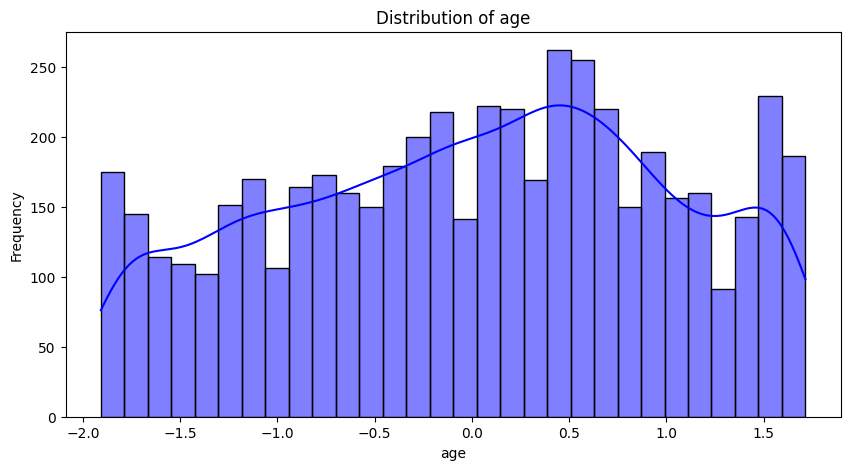

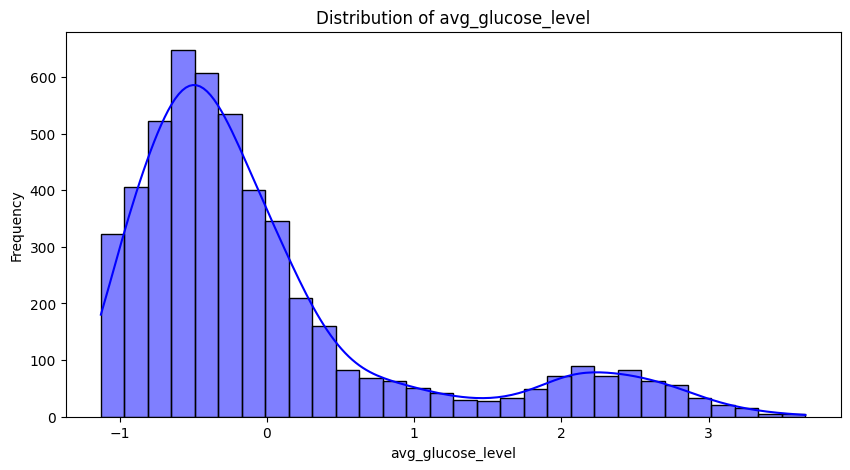

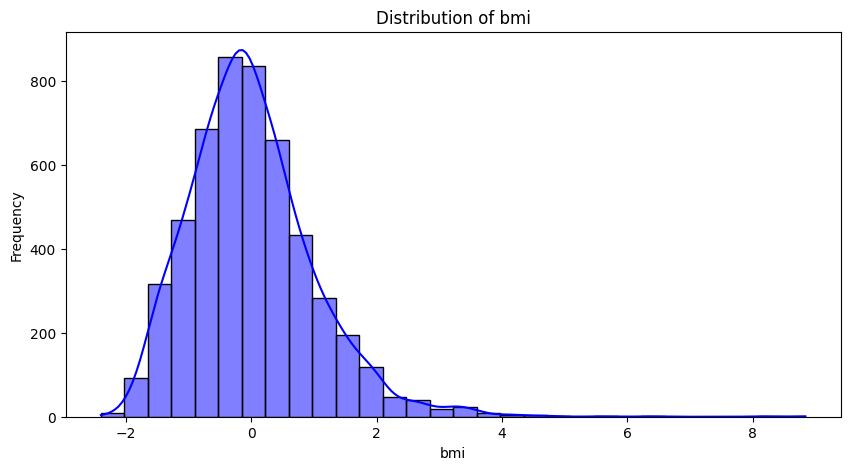

In [ ]:
# Histogram
for col in ['age', 'avg_glucose_level', 'bmi']:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# power transformation for skewed features
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df[['avg_glucose_level', 'bmi']] = pt.fit_transform(df[['avg_glucose_level', 'bmi']])



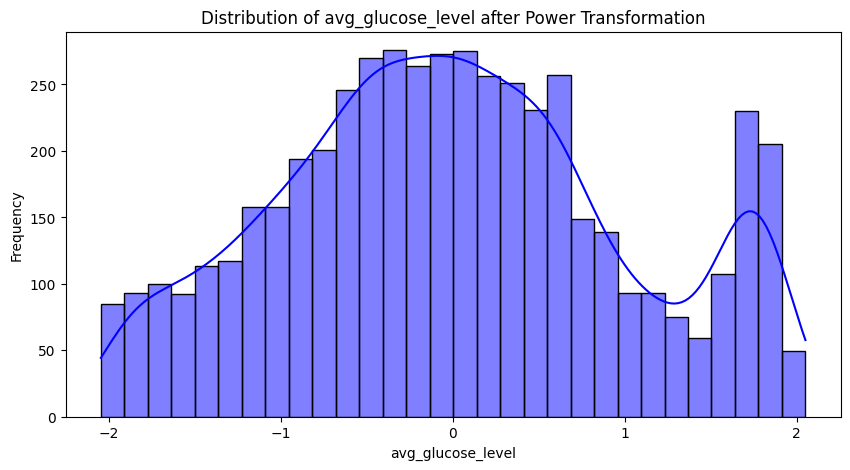

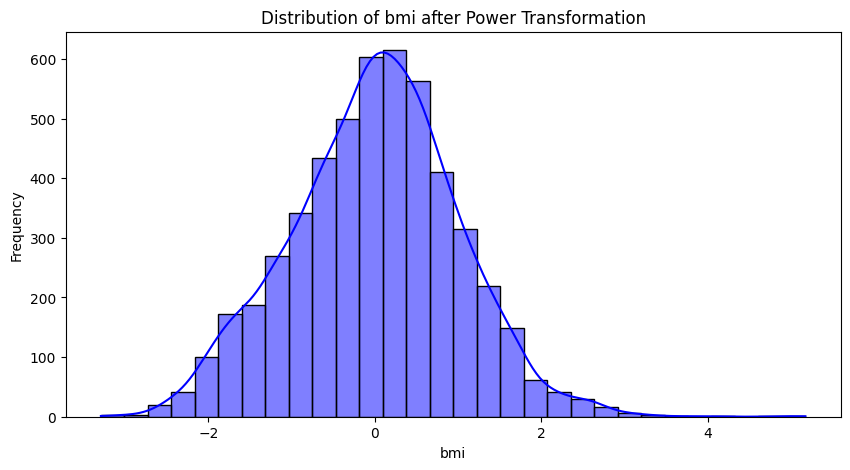

In [180]:
# check the distribution after power transformation

for col in ['avg_glucose_level', 'bmi']:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col} after Power Transformation')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [1]:
# save to CSV
output_file_path = os.path.join(os.getcwd(), 'processed_stroke_data.csv')

NameError: name 'os' is not defined

### Final Df
- Unnecessary dropped
- Encoded using label encoding
- Missing values imputed with KNN
- Scaled using StandardScaler
- Outliers handled using power transfotmation
##### Ready for Logestic Regression

In [182]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,1.051434,0.0,1.0,1.0,2.0,1.0,1.846711,1.025774,1.0,1.0
1,0.0,0.786070,0.0,0.0,1.0,3.0,0.0,1.686390,0.714684,2.0,1.0
2,1.0,1.626390,0.0,1.0,1.0,2.0,0.0,0.430357,0.583715,2.0,1.0
3,0.0,0.255342,0.0,0.0,1.0,2.0,1.0,1.443331,0.795610,3.0,1.0
4,0.0,1.582163,1.0,0.0,1.0,3.0,0.0,1.469413,-0.602267,2.0,1.0
5,1.0,1.670617,0.0,0.0,1.0,2.0,1.0,1.570191,0.149957,1.0,1.0
6,1.0,1.361026,1.0,1.0,1.0,2.0,0.0,-1.086950,-0.073761,2.0,1.0
7,0.0,1.139889,0.0,0.0,0.0,2.0,1.0,0.056750,-0.804200,2.0,1.0
8,0.0,0.697615,0.0,0.0,1.0,2.0,0.0,-0.754779,-0.073761,0.0,1.0
9,0.0,1.537935,0.0,0.0,1.0,2.0,1.0,-1.807753,-0.569352,0.0,1.0
